In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from bresenham import bresenham
from numpy import matmul as mm
from tqdm import tqdm
from scipy.stats import mode
import math
import tqdm

from helpers import particle_localization

### Load data

In [3]:
data = sio.loadmat('data/practice.mat')

M = data['M']
init_pose = data['init_pose']
pose = data['pose']
ranges = data['ranges']
scanAngles = data['scanAngles']
t = data['t']

In [4]:
param = {}
param['resol'] = 25
param['origin'] = np.array([[685],[572]])
param['init_pose'] = -init_pose

### Lidar Measurements

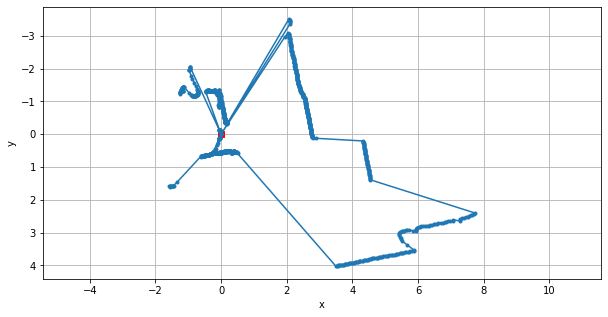

In [5]:
tmp1 = ranges[:,0].reshape(-1,1) * np.cos(scanAngles)
tmp2 = -ranges[:,0].reshape(-1,1) * np.sin(scanAngles)
lidar_local = np.hstack((tmp1,tmp2))

plt.figure(figsize=(10, 5))
plt.plot(0, 0, 'rs')
plt.plot(lidar_local[:, 0],lidar_local[:,1 ],'.-')
plt.axis('equal')
plt.gca().invert_yaxis()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

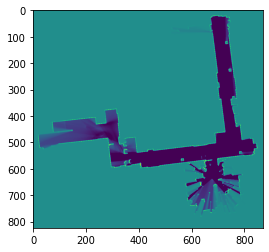

In [6]:
plt.imshow(M)

### Global Localization of Robot

In [7]:
lidar_global = np.zeros((ranges.shape[0], 2))
lidar_global[:,0] = np.array([(ranges[:,0] * np.cos(scanAngles + pose[2, 0]).flatten()+
                      pose[0, 0]) * param['resol'] + param['origin'][0]])
lidar_global[:,1]=np.array([(-ranges[:, 0] * np.sin(scanAngles + pose[2, 0]).flatten()+
                      pose[1, 0]) * param['resol'] + param['origin'][1]])

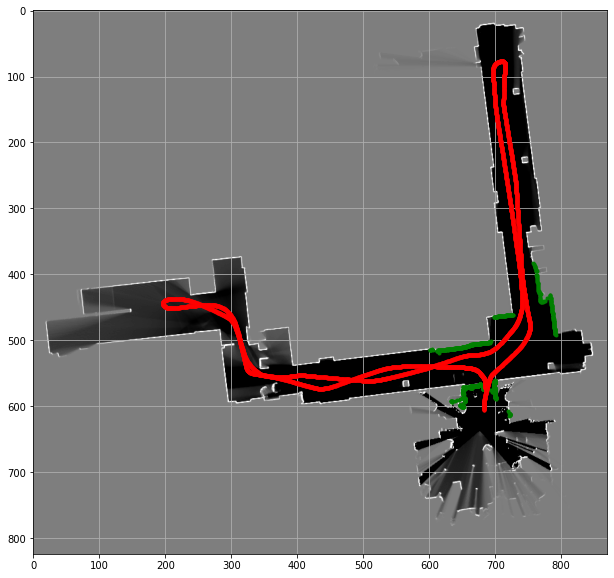

In [8]:
plt.figure(figsize=(20, 10))
plt.imshow(M,cmap='gray')
plt.plot(lidar_global[:,0], lidar_global[:, 1],'g.')
plt.grid(True)
plt.plot(pose[0,:] * param['resol'] + param['origin'][0], pose[1,:] * param['resol'] + param['origin'][1],'r.-')

In [9]:
pose = particle_localization(ranges[:, :1000], scanAngles, M, param)

100%|██████████| 999/999 [02:02<00:00,  8.19it/s]


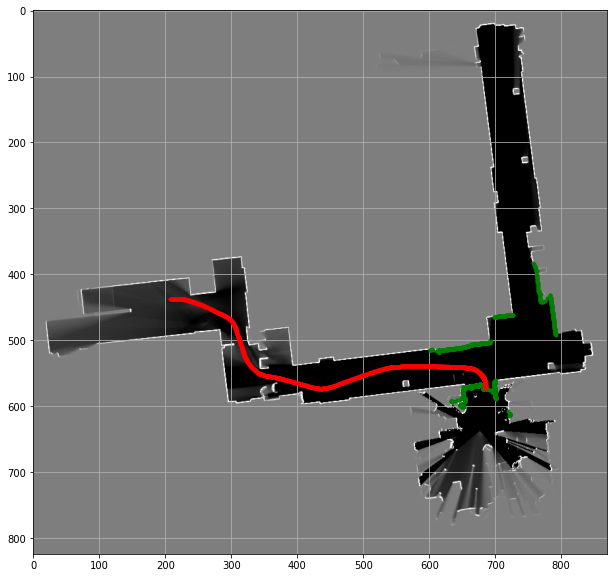

In [10]:
lidar_global = np.zeros((ranges.shape[0], 2))
lidar_global[:, 0] = np.array([(ranges[:, 0] * np.cos(scanAngles + pose[2, 0]).flatten() +
                      pose[0,0]) * param['resol'] + param['origin'][0]])
lidar_global[:,1] = np.array([(-ranges[:, 0] * np.sin(scanAngles + pose[2,0]).flatten() +
                      pose[1,0]) * param['resol'] + param['origin'][1]])

plt.figure(figsize=(20, 10))
plt.imshow(M, cmap='gray')
plt.plot(lidar_global[:, 0], lidar_global[:, 1],'g.')
plt.grid(True)
plt.plot(pose[0, :] * param['resol'] + param['origin'][0], pose[1, :] * param['resol'] + param['origin'][1],'r.-')